#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### Challenge 1 : Check the current working directory status

In [2]:
os.getcwd()

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\notebook'

#### Challenge 2: set the working directory to correct directory

In [3]:
#### As it shows the wrong directory

os.chdir('e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset')
os.getcwd()

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset'

#### Extract the data from XML Annotations and image files

### Challenge 3: copy both files in one common folder

In [4]:
#### In our dataset we have images folder and Annotations folder
## but we want both in one common folder so for that

## Now, we copied both files in one common folder

import xml.etree.ElementTree as xet
from glob import glob

#### Create XML path

In [5]:
xml_path = os.path.join(os.getcwd(), 'common', '*xml')
path = glob(xml_path)

## Data Extraction and XML Parsing

**Step 1** : we have to parse the file

**Step 2** : find the root node for this xml tree

**Step 3**: find the first targeted tag then, we have to find the 2nd targeted tag

**Step 4:** Now, after finding the` filenames, xmax, amin, ymax and ymin` we have to save them in a dictionary because then we convert it into a dataframe or csv file.

**Step 5:** As of now, we find the `xmax, xmin, ymax and ymin` but we don't have the image filename, find it and insert.

In [6]:
# Let's create a dictionary which have certain list as values, filepath=[], xmin[], xmax[], ymin[], ymax[]

label_dict = dict(filepath=[], xmin=[], xmax=[], ymin=[], ymax=[])

for file in path:
    data = xet.parse(file)
    root = data.getroot()
    object = root.find('object')
    bnd_boxtag = object.find('bndbox')
    
    x_min = int(bnd_boxtag.find('xmin').text)
    x_max = int(bnd_boxtag.find('xmax').text)
    y_min = int(bnd_boxtag.find('ymin').text)
    y_max = int(bnd_boxtag.find('ymax').text)
    
    # Appending extracted coordinates into a dictonary
    
    label_dict['filepath'].append(file)
    label_dict['xmin'].append(x_min)
    label_dict['xmax'].append(x_max)
    label_dict['ymin'].append(y_min)
    label_dict['ymax'].append(y_max)

#### Converted Extracted XML data into a dataframe

In [7]:
df = pd.DataFrame(label_dict)
df.to_csv('labels.csv', index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,226,419,125,173
1,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,134,262,128,160
2,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,140,303,5,148
3,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,175,214,114,131
4,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,167,240,202,220


#### Extract respective image filename of XML and inserting it into a dataframe

In [8]:
def get_filename(filename):
    image_filename = xet.parse(filename).getroot().find('filename').text
    image_filepath = os.path.join(os.getcwd(), 'common', image_filename)
    return image_filepath

In [9]:
image_path = list(df['filepath'].apply(get_filename))

In [10]:
image_path[100]

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset\\common\\Cars189.png'

In [14]:
import plotly.express as px
from skimage import io
from IPython.display import Image
from PIL import Image, ImageDraw

In [21]:
# Define the input image file path
file_path = "e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset\\common\\Cars189.png"

# Read the image
image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')

# Define the coordinates
x_min, y_min, x_max, y_max = 285, 241, 423, 286

# Draw the rectangle on the image
draw = ImageDraw.Draw(img)
draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

# Save the image with the rectangle drawn
image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')
img.save(image_filepath)

# Display the image
img.show()



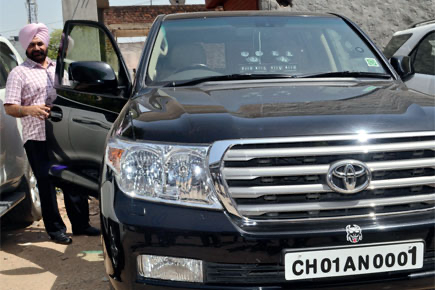

In [13]:
file_path = image_path[100] #path of our image Cars189.png
img = cv2.imread(file_path) #read the image
# xmin-285/ymin-241/xmax-423/ymax-286
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - Cars189.png with bounding box')
fig.add_shape(type='rect',x0=285, x1=423, y0=241, y1=286, xref='x', yref='y',line_color='cyan')
image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')
Image(filename=image_filepath) 

In [22]:
import plotly.express as px
import os
from IPython.display import Image

# Define the file path
file_path = image_path[100]  # Path of the image Cars189.png

# Read the image using plotly
img = io.imread(file_path)  # Read the image

# Define the coordinates
x_min, y_min, x_max, y_max = 285, 241, 423, 286

# Create the plotly figure and add the rectangle shape
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Figure 1 - Cars189.png with bounding box')
fig.add_shape(type='rect', x0=x_min, x1=x_max, y0=y_min, y1=y_max, xref='x', yref='y', line_color='cyan')

# Save the figure to an image file
image_filepath = os.path.join(os.getcwd(), 'Test', 'test_image.png')
pio.write_image(fig, image_filepath, engine='kaleido')

# Display the saved image
Image(filename=image_filepath)


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
